<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(1_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.6_n250.csv',
 'data_multi_delta_1.6_n120.csv',
 'data_multi_delta_1.6_n60.csv',
 'data_multi_delta_1.6_n30.csv',
 'data_multi_delta_1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,47.585408,-0.212840,57.372568,58.300680,-0.928112
1,0.0,1.0,37.809635,36.534569,84.344204,58.147484,26.196719
2,0.0,2.0,26.907893,-10.931835,25.976057,57.976643,-32.000586
3,0.0,3.0,28.737091,2.109031,40.846122,58.005308,-17.159187
4,0.0,4.0,92.268482,-91.897042,10.371440,59.000908,-48.629468
...,...,...,...,...,...,...,...
19995,999.0,15.0,70.288240,-20.500500,59.787740,75.181635,-15.393895
19996,999.0,16.0,27.092215,22.154052,59.246266,47.911341,11.334925
19997,999.0,17.0,86.148501,9.275472,105.423972,85.194453,20.229519
19998,999.0,18.0,41.060551,8.133514,59.194065,56.729760,2.464305


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,47.585408,-0.212840,57.372568,58.300680,-0.928112
1,0.0,1.0,37.809635,36.534569,84.344204,58.147484,26.196719
2,0.0,2.0,26.907893,-10.931835,25.976057,57.976643,-32.000586
3,0.0,3.0,28.737091,2.109031,40.846122,58.005308,-17.159187
4,0.0,4.0,92.268482,-91.897042,10.371440,59.000908,-48.629468
...,...,...,...,...,...,...,...
19995,999.0,15.0,70.288240,-20.500500,59.787740,75.181635,-15.393895
19996,999.0,16.0,27.092215,22.154052,59.246266,47.911341,11.334925
19997,999.0,17.0,86.148501,9.275472,105.423972,85.194453,20.229519
19998,999.0,18.0,41.060551,8.133514,59.194065,56.729760,2.464305


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y      y_hat      e_hat
rep   index                                                        
0.0   0.0    47.585408  -0.212840   57.372568  58.300680  -0.928112
      1.0    37.809635  36.534569   84.344204  58.147484  26.196719
      2.0    26.907893 -10.931835   25.976057  57.976643 -32.000586
      3.0    28.737091   2.109031   40.846122  58.005308 -17.159187
      4.0    92.268482 -91.897042   10.371440  59.000908 -48.629468
...                ...        ...         ...        ...        ...
999.0 15.0   70.288240 -20.500500   59.787740  75.181635 -15.393895
      16.0   27.092215  22.154052   59.246266  47.911341  11.334925
      17.0   86.148501   9.275472  105.423972  85.194453  20.229519
      18.0   41.060551   8.133514   59.194065  56.729760   2.464305
      19.0   88.324948 -13.715090   84.609858  86.568477  -1.958619

[20000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y      y_hat      e_hat
rep   index                                                        
0.0   0.0    47.585408  -0.212840   57.372568  58.300680  -0.928112
      1.0    37.809635  36.534569   84.344204  58.147484  26.196719
      2.0    26.907893 -10.931835   25.976057  57.976643 -32.000586
      3.0    28.737091   2.109031   40.846122  58.005308 -17.159187
      4.0    92.268482 -91.897042   10.371440  59.000908 -48.629468
...                ...        ...         ...        ...        ...
999.0 15.0   70.288240 -20.500500   59.787740  75.181635 -15.393895
      16.0   27.092215  22.154052   59.246266  47.911341  11.334925
      17.0   86.148501   9.275472  105.423972  85.194453  20.229519
      18.0   41.060551   8.133514   59.194065  56.729760   2.464305
      19.0   88.324948 -13.715090   84.609858  86.568477  -1.958619

[20000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,47.585408,-0.212840,57.372568,58.300680,-0.928112
1,0.0,1.0,37.809635,36.534569,84.344204,58.147484,26.196719
2,0.0,2.0,26.907893,-10.931835,25.976057,57.976643,-32.000586
3,0.0,3.0,28.737091,2.109031,40.846122,58.005308,-17.159187
4,0.0,4.0,92.268482,-91.897042,10.371440,59.000908,-48.629468
...,...,...,...,...,...,...,...
19995,999.0,15.0,70.288240,-20.500500,59.787740,75.181635,-15.393895
19996,999.0,16.0,27.092215,22.154052,59.246266,47.911341,11.334925
19997,999.0,17.0,86.148501,9.275472,105.423972,85.194453,20.229519
19998,999.0,18.0,41.060551,8.133514,59.194065,56.729760,2.464305


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1          e           Y      y_hat      e_hat
rep   index                                                        
0.0   0.0    47.585408  -0.212840   57.372568  58.300680  -0.928112
      1.0    37.809635  36.534569   84.344204  58.147484  26.196719
      2.0    26.907893 -10.931835   25.976057  57.976643 -32.000586
      3.0    28.737091   2.109031   40.846122  58.005308 -17.159187
      4.0    92.268482 -91.897042   10.371440  59.000908 -48.629468
...                ...        ...         ...        ...        ...
999.0 15.0   70.288240 -20.500500   59.787740  75.181635 -15.393895
      16.0   27.092215  22.154052   59.246266  47.911341  11.334925
      17.0   86.148501   9.275472  105.423972  85.194453  20.229519
      18.0   41.060551   8.133514   59.194065  56.729760   2.464305
      19.0   88.324948 -13.715090   84.609858  86.568477  -1.958619

[20000 rows x 5 columns]

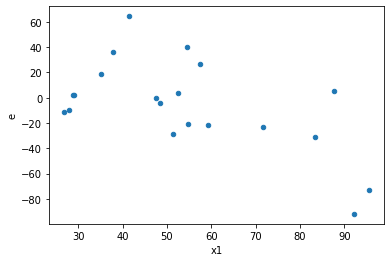

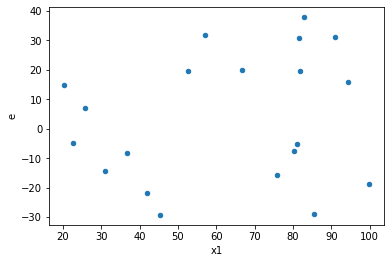

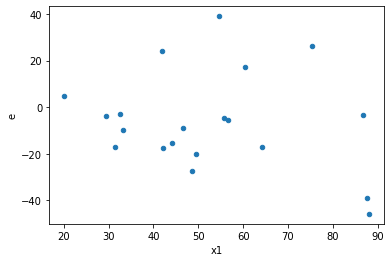

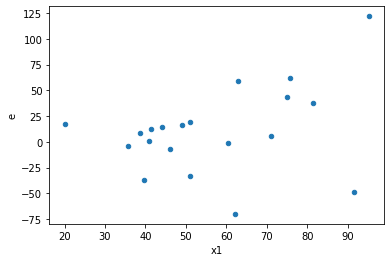

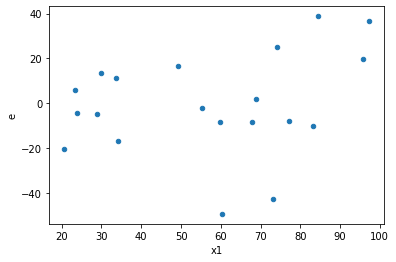

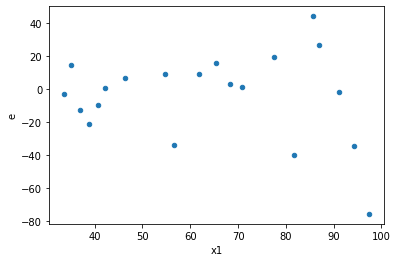

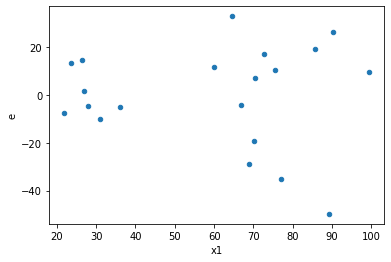

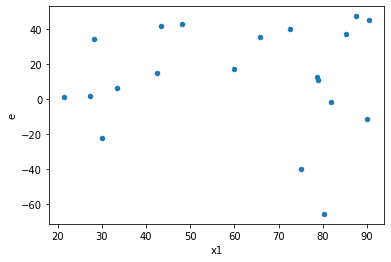

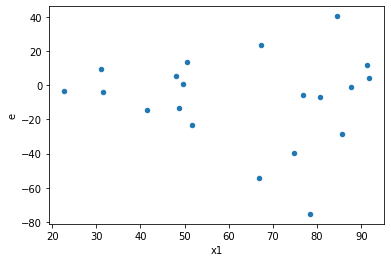

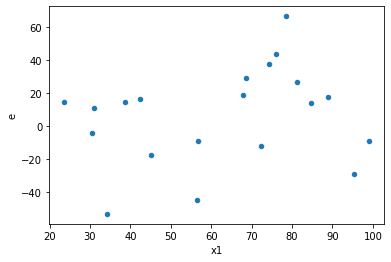

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,7.0,7.0,3423.6753509589926,6112.165782999942,489.0964787084275,873.1665404285632,1.7852644180435762,0.4623431900892665,0.7688284049553668,0.23117159504463325,Reject001=1 : Homoscedasticity
1.0,7.0,7.0,2006.9474982026777,3973.306435391941,286.70678545752537,567.6152050559915,1.9797759726899864,0.3876088235770927,0.8061955882114537,0.19380441178854635,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,1375.952823014212,3260.765485043151,196.5646890020303,465.8236407204501,2.3698236091409006,0.2776119356721083,0.8611940321639459,0.13880596783605414,Reject001=1 : Homoscedasticity
3.0,7.0,7.0,1988.441423485392,24466.70328184389,284.06306049791317,3495.2433259776985,12.304462677586958,0.0037317435577366442,0.9981341282211317,0.0018658717788683221,Reject001=0 : Heteroscedasticity
4.0,7.0,7.0,968.56469153851,3750.991417424162,138.36638450550143,535.8559167748803,3.8727319405644707,0.09476834021696123,0.9526158298915194,0.04738417010848062,Reject001=1 : Homoscedasticity
5.0,7.0,7.0,911.195383514685,8511.014104767053,130.17076907352643,1215.8591578238647,9.340493003748726,0.00862240046346252,0.9956887997682687,0.00431120023173126,Reject001=0 : Heteroscedasticity
6.0,7.0,7.0,659.176889199459,5311.311719592254,94.16812702849414,758.7588170846077,8.057490798930475,0.013320091979732274,0.9933399540101339,0.006660045989866137,Reject001=1 : Homoscedasticity
7.0,7.0,7.0,2223.425291738674,7842.371796731354,317.63218453409627,1120.3388281044793,3.527157771331628,0.1182815216601587,0.9408592391699206,0.05914076083007935,Reject001=1 : Homoscedasticity
8.0,7.0,7.0,696.5255777198329,6203.420651411561,99.50365395997612,886.2029502016516,8.906235247985101,0.009930969182287974,0.995034515408856,0.004965484591143987,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,3423.6753509589926,6112.165782999942,489.0964787084275,873.1665404285632,1.7852644180435762,0.4623431900892665,Reject001=1 : Homoscedasticity
1.0,7.0,7.0,2006.9474982026777,3973.306435391941,286.70678545752537,567.6152050559915,1.9797759726899864,0.3876088235770927,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,1375.952823014212,3260.765485043151,196.5646890020303,465.8236407204501,2.3698236091409006,0.2776119356721083,Reject001=1 : Homoscedasticity
3.0,7.0,7.0,1988.441423485392,24466.70328184389,284.06306049791317,3495.2433259776985,12.304462677586958,0.0037317435577366442,Reject001=0 : Heteroscedasticity
4.0,7.0,7.0,968.56469153851,3750.991417424162,138.36638450550143,535.8559167748803,3.8727319405644707,0.09476834021696123,Reject001=1 : Homoscedasticity
5.0,7.0,7.0,911.195383514685,8511.014104767053,130.17076907352643,1215.8591578238647,9.340493003748726,0.00862240046346252,Reject001=0 : Heteroscedasticity
6.0,7.0,7.0,659.176889199459,5311.311719592254,94.16812702849414,758.7588170846077,8.057490798930475,0.013320091979732274,Reject001=1 : Homoscedasticity
7.0,7.0,7.0,2223.425291738674,7842.371796731354,317.63218453409627,1120.3388281044793,3.527157771331628,0.1182815216601587,Reject001=1 : Homoscedasticity
8.0,7.0,7.0,696.5255777198329,6203.420651411561,99.50365395997612,886.2029502016516,8.906235247985101,0.009930969182287974,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      845
Reject001=0 : Heteroscedasticity    155
Name: Result_test, dtype: int64